In [1]:
# import pandas as pd
# import numpy as np
# import statsmodels

In [13]:
# data = open('./vegetable.log', 'r+', encoding='gbk')
# data = data.readlines()
# data = list(map(lambda x: x.split(' '), data))
# def get(x):
#     return [x[0], x[1], x[5]]
# data = list(map(get, data))
# def get(x):
#     return [x[0], x[1], x[-1][:x[-1].find('元')]]
# data = list(map(get, data))
# data = pd.DataFrame(data, columns=['date', 'variety', 'price'])
# data['price'] = data['price'].astype('float')
# data.to_csv('./vegetable.csv', index=False)

In [1]:
import warnings
import itertools
import datetime
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [49]:
def get_time(x):
    return str(datetime.datetime.strptime(x, '%Y-%m-%d'))[:10]
data = pd.read_csv('./vegetable.csv')
data['date'] = data['date'].apply(get_time)
data = data.groupby('date')['price'].mean()
print(data)

date
2020-06-16    5.154545
2020-06-17    3.228571
2020-06-18    4.320000
2020-06-19    1.400000
2020-06-22    4.537500
                ...   
2020-10-22    5.042308
2020-11-16    4.400000
2020-11-19    4.382500
2021-09-03    4.787500
2021-12-28    4.920000
Name: price, Length: 67, dtype: float64


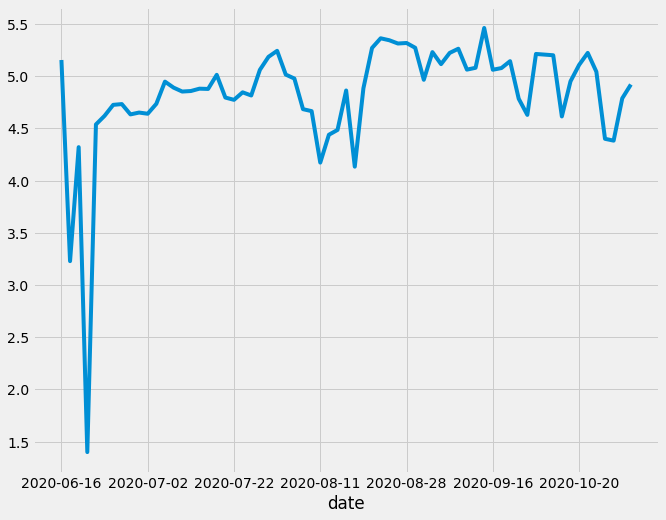

In [50]:
data.plot(figsize=(10, 8))
plt.show()

In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('季节性ARIMA参数示例：')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

季节性ARIMA参数示例：
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
warnings.filterwarnings("ignore")
best_param = None
best_param_sea = None
best_aic = 100
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data, order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_param = param
                best_param_sea = param_seasonal
                best_aic = results.aic
        except:
            continue
print('最优参数：', best_param, best_param_sea)
print('最小aic：', best_aic)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:397.9749844149711
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:286.5872893657227
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:110.2375916004651
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:51.505815119954
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:112.71884665479003
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:111.07022965865555
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:51.4899443550145
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:39.718866510941645
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:317.72545431915086
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:221.36308629690203
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:99.00230165358694
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:39.004149976290606
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:110.52254946940158
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:101.41715160176274
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:40.64798667459104
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:24.89595690926304
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:121.1852256151792
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:19.25946620299102
ARIMA

In [26]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5668      0.141      4.007      0.000       0.290       0.844
ma.L1         -1.0000    249.850     -0.004      0.997    -490.696     488.696
ar.S.L12    1.679e-06      0.189   8.87e-06      1.000      -0.371       0.371
sigma2         0.0616     15.393      0.004      0.997     -30.109      30.232


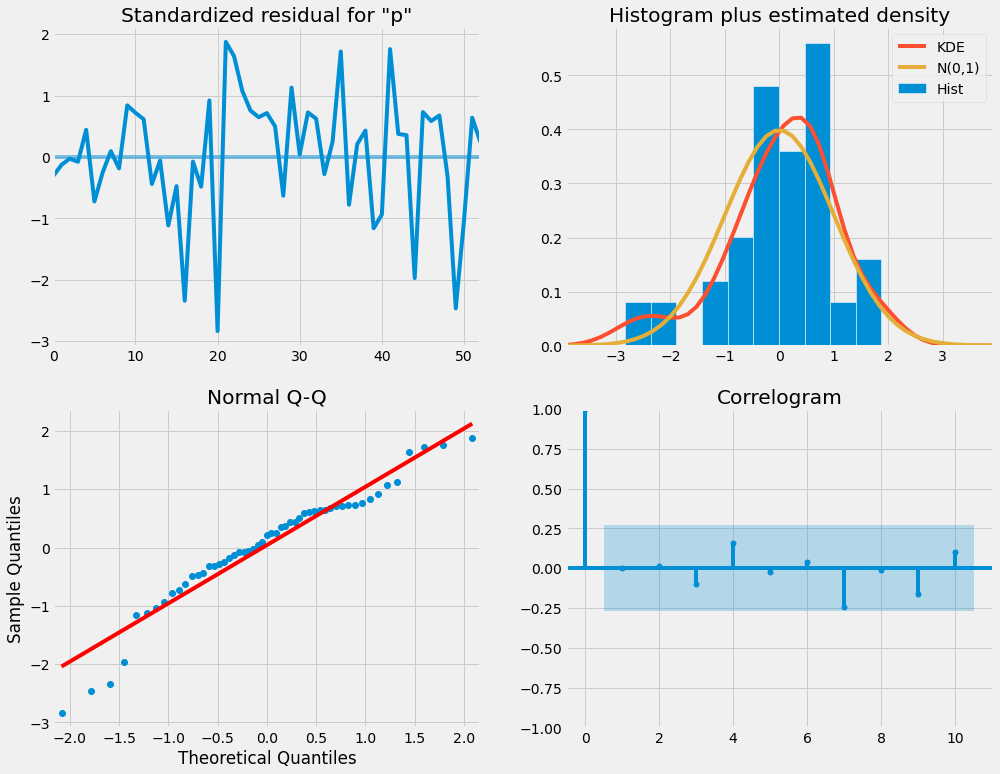

In [27]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [33]:
pred = results.get_prediction(start='2020-08-28', dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)

            lower price  upper price
date                                
2020-08-28     4.641720     5.631900
2020-08-31     4.651080     5.640670
2020-09-01     4.629645     5.618685
2020-09-03     4.450870     5.439396
2020-09-04     4.610222     5.598265
2020-09-07     4.545590     5.533180
2020-09-08     4.612122     5.599284
2020-09-10     4.639478     5.626237
2020-09-11     4.524349     5.510728
2020-09-15     4.536137     5.522155
2020-09-16     4.763951     5.749628
2020-09-17     4.532206     5.517559
2020-09-21     4.542887     5.527931
2020-09-22     4.583133     5.567884
2020-09-24     4.372360     5.356832
2020-09-27     4.279268     5.263474
2020-09-29     4.620191     5.604143
2020-10-10     4.618861     5.602570
2020-10-13     4.617376     5.600852
2020-10-14     4.274962     5.258216
2020-10-20     4.469181     5.452221
2020-10-21     4.561554     5.544390
2020-10-22     4.630227     5.612866
2020-11-16     4.526631     5.509081
2020-11-19     4.150765     5.133033
2

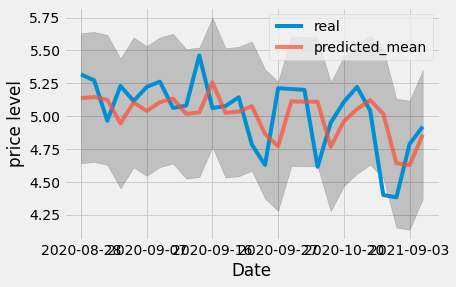

In [51]:

ax = data['2020-08-28':].plot(label='real')
pred.predicted_mean.plot(ax=ax, alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('price level')
plt.legend()
plt.show()

In [54]:
y_forecasted = pred.predicted_mean
y_truth = data['2020-08-28':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 0.06
